In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from collections.abc import Callable
from typing import List

In [ ]:
# Have a quadratic objective function:
# F(x) = x.T @ P @ x + q.T @ x + r
# We want to get to the lowest point possible

Q = np.array([[10, 0], [0, 1]])
q = np.array([0, 0])
r = np.array([0])
def generate(Q: np.ndarray, q: np.ndarray, r: np.ndarray):
  f = lambda x: x.T @ Q @ x + q.T @ x + r
  grad_f = lambda x: 2 * Q @ x + q
  return (f, grad_f)
f, grad_f = generate(Q, q, r)

In [ ]:
grad_f(np.array([1, 1]))

array([20,  2])

In [ ]:
def gd(
    grad_fn: Callable[[np.ndarray], np.ndarray],
    fn: Callable[[np.ndarray], float],
    init: np.ndarray,
    max_steps: int,
    epsilon: float,
    step_size: float):

  x = init
  x_values = []
  for step in range(max_steps):
    x_values.append(x)
    grad = grad_fn(x)
    if np.linalg.norm(grad, ord=2) < epsilon:
      break
    x = x - step_size * grad

  return np.array(x_values)

def gd_backtrack(
        grad_fn: Callable[[np.ndarray], np.ndarray],    # Gradient of the function
        fn: Callable[[np.ndarray], float],         # The function itself
        init: np.ndarray,           # The starting vector
        max_steps: int,             # Maximum number of gd iterations. If exceeded, gd will halt.
        epsilon: float,             # A tolerance that defines a gradient based stopping criterion.
        reduction_param: float,     # Self explanatory (alpha)
        backtrack_param: float,     # Self explanatory (beta)
    ):

    x = init
    x_values = []
    for step in range(max_steps):
        x_values.append(x)
        gradient = grad_fn(x)
        if np.linalg.norm(gradient, ord=2) <= epsilon:
            # We have satisfied the stopping crietrion (L2 norm less than specified tolerance)
            break
        # print(np.linalg.norm(gradient, ord=2))

        # This is doing a backtracking search
        bt_step_size = 1
        while fn(x-bt_step_size*gradient) > fn(x) - reduction_param*bt_step_size*np.linalg.norm(gradient, ord=2)**2:
            bt_step_size *= backtrack_param
        x = x - bt_step_size * gradient
        print(bt_step_size)

    return np.array(x_values)

def gd_heavyball(
    grad_fn: Callable[[np.ndarray], np.ndarray],
    fn: Callable[[np.ndarray], float],
    init: np.ndarray,
    max_steps: int,
    epsilon: float,
    step_size: float,
    momentum_beta: float):
  x = init; x_prev = init

  x_values = []
  for step in range(max_steps):
    x_values.append(x)
    y = x + momentum_beta * (x - x_prev)
    grad = grad_fn(x)
    if np.linalg.norm(grad, ord=2) < epsilon:
      break
    x_prev = x
    x = y - step_size * grad
    #print(x)

  return np.array(x_values)

In [ ]:
f, grad_f = generate(np.array([[1, 0], [0, 1]]), q, r)
x_values_0 = gd_backtrack(grad_f, f, np.array([1, 1]), 100, 1e-5, 0.5, 0.99)
x_values_0
f(x_values_0[-1])
x_values_0.shape

0.4998370298991989
0.4998370298991989


(3, 2)

In [ ]:
f0, grad_f0 = generate(np.array([[1, 0], [0, 1]]), q, r)
x_values_0 = gd(grad_f0, f0, np.array([1, 1]), 100, 1e-5, 0.1)
f1, grad_f1 = generate(np.array([[10, 0], [0, 1]]), q, r)
x_values_1 = gd(grad_f0, f0, np.array([1, 1]), 100, 1e-5, 0.1)

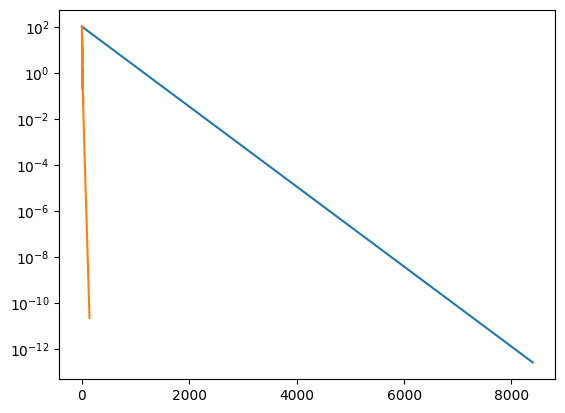

In [ ]:
f1, grad_f1 = generate(np.array([[99.9, 0], [0, 1]]), q, r)
x_values_gd = gd(grad_f1, f1, np.array([1, 1]), 10000, 1e-5, 0.01)
x_values_hb = gd_heavyball(grad_f1, f1, np.array([1, 1]), 10000, 1e-5, 0.01, 0.7)

f_values_gd = np.apply_along_axis(f1, 1, x_values_gd)
f_values_hb = np.apply_along_axis(f1, 1, x_values_hb)
plt.plot(f_values_gd)
plt.yscale('log')
plt.plot(f_values_hb)

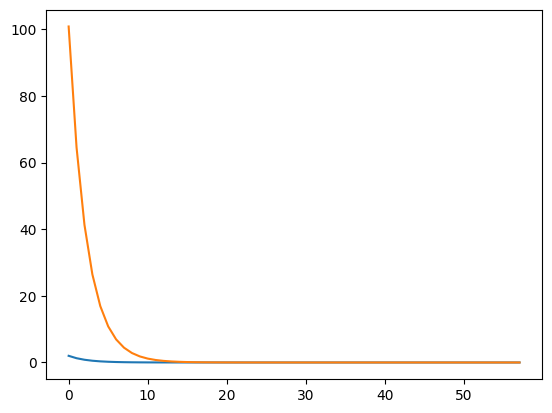

In [ ]:
f_values_0 = np.apply_along_axis(f0, 1, x_values_0)
f_values_1 = np.apply_along_axis(f1, 1, x_values_1)
plt.plot(f_values_0)
plt.plot(f_values_1)

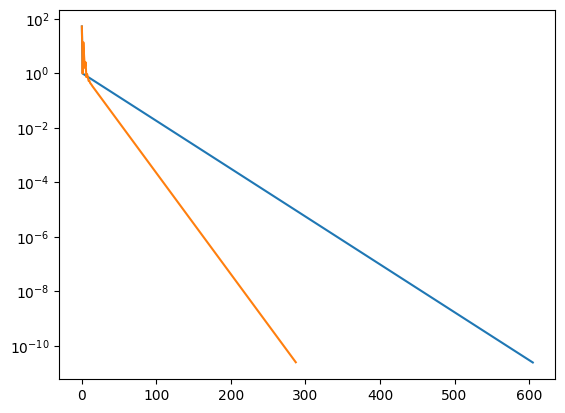

In [ ]:
f1, grad_f1 = generate(np.array([[50, 0], [0, 1]]), q, r)
x_values_gd = gd(grad_f1, f1, np.array([1, 1]), 10000, 1e-5, 0.01)
x_values_hb = gd_heavyball(grad_f1, f1, np.array([1, 1]), 10000, 1e-5, 0.01, 0.5)

f_values_gd = np.apply_along_axis(f1, 1, x_values_gd)
f_values_hb = np.apply_along_axis(f1, 1, x_values_hb)
plt.plot(f_values_gd)
plt.yscale('log')
plt.plot(f_values_hb)



1.0
9.0
1.0 0.5


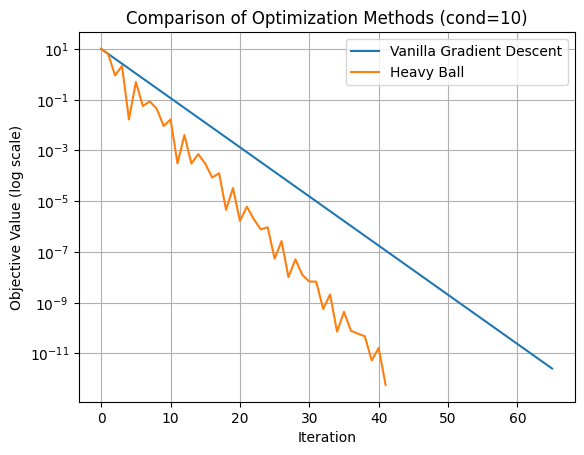

In [ ]:
# Define a symmetric positive definite matrix Q (2D example)
P = np.array([[9, 0], [0, 1]])
q = np.array([0, 0])
r = np.array([0])
x0 =np.array([1, 1])

# Compute eigenvalues of Q
eigenvalues = np.linalg.eigvals(P)
lambda_min = np.min(eigenvalues)
lambda_max = np.max(eigenvalues)
print(lambda_min)
print(lambda_max)
# Compute optimal alpha and beta for the Heavy Ball method
alpha_star = 4 / (np.sqrt(lambda_max) - np.sqrt(lambda_min))**2
beta_star = (np.sqrt(lambda_max) - np.sqrt(lambda_min)) / (np.sqrt(lambda_max) + np.sqrt(lambda_min))

alpha_star_reduced = alpha_star * 0.1

print(alpha_star, beta_star)
f1, grad_f1 = generate(P, q, r)
x_values_gd = gd(grad_f1, f1, x0, 10000, 1e-5, 0.1)
x_values_hb = gd_heavyball(grad_f1, f1, x0, 10000, 1e-5, alpha_star_reduced, beta_star)

f_values_gd = np.apply_along_axis(f1, 1, x_values_gd)
f_values_hb = np.apply_along_axis(f1, 1, x_values_hb)
plt.plot(f_values_gd, label="Vanilla Gradient Descent")
plt.yscale('log')
plt.plot(f_values_hb, label="Heavy Ball")
plt.xlabel("Iteration")
plt.ylabel("Objective Value (log scale)")
plt.title("Comparison of Optimization Methods (cond=10)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Define Conjugate Gradient Method
def conjugate_gradient(f, grad_f, x0, max_iters, tol):
    x = x0.copy()
    g = grad_f(x)
    d = -g
    trajectory = [x.copy()]
    for k in range(max_iters):
        alpha = -(g @ d) / (d @ (grad_f(x + 1e-5 * d) - g) / 1e-5)
        x_new = x + alpha * d
        g_new = grad_f(x_new)
        beta = (g_new @ g_new) / (g @ g)
        d = -g_new + beta * d
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        g = g_new
    return np.array(trajectory)

In [ ]:
# Define Nesterov Accelerated Gradient Descent
def gd_nesterov(grad_f, f, x0, max_iters, tol, alpha):
    x = x0
    y = x0
    trajectory = [x.copy()]
    for k in range(1, max_iters + 1):
        grad = grad_f(y)
        x_new = y - alpha * grad
        print(x_new)
        y = x_new + (k - 1) / (k + 2) * (x_new - x)
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return np.array(trajectory)

[0.05  0.099]
[0.025   0.09801]
[0.009375   0.09678488]
[0.0015625  0.09533188]
[-0.00117187  0.09365932]
[-0.00136719  0.09177654]
[-0.00074463  0.08969381]
[-0.00016479  0.08742226]
[0.00012054 0.08497386]
[0.00016403 0.08236127]
[9.83238220e-05 7.95978138e-02]
[2.38895416e-05 7.66973549e-02]
[-1.72972679e-05  7.36742387e-02]
[-2.51233578e-05  7.05431882e-02]
[-1.57410279e-05  6.73192177e-02]
[-4.00720164e-06  6.40175412e-02]
[2.88549345e-06 6.06534828e-02]
[4.34493413e-06 5.72423855e-02]
[2.79272936e-06 5.37995233e-02]
[7.31134060e-07 5.03400136e-02]
[-5.24667303e-07  4.68787327e-02]
[-8.08334244e-07  4.34302339e-02]
[-5.28271408e-07  4.00086695e-02]
[-1.40908057e-07  3.66277159e-02]
[1.00879762e-07 3.33005037e-02]
[1.57901134e-07 3.00395518e-02]
[1.04406536e-07 2.68567078e-02]
[2.82229315e-08 2.37630923e-02]
[-2.01711565e-08  2.07690499e-02]
[-3.19409728e-08  1.78841060e-02]
[-2.13036844e-08  1.51169294e-02]
[-5.81671113e-09  1.24753012e-02]
[4.15188225e-09 9.96609016e-03]
[6.63301

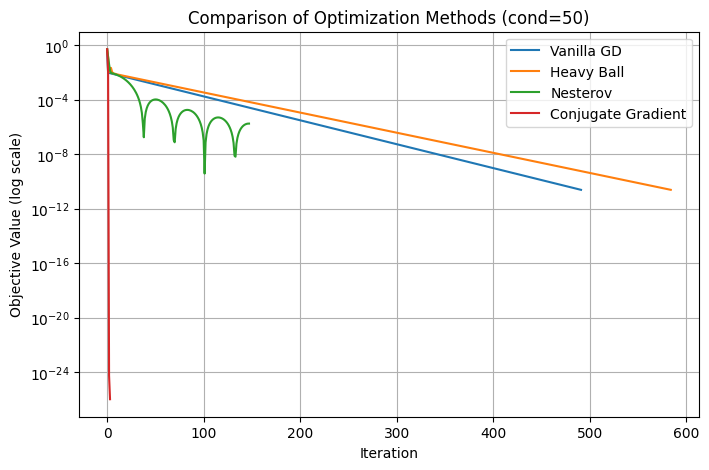

In [ ]:
# Define a moderately high condition number matrix to avoid overflow while comparing all methods
x0_scaled = np.array([0.1,0.1])
Q_moderate_cond = np.array([[50, 0], [0, 1]])  # condition number = 50
q_mod = np.array([0, 0])
r_mod = 0

# Generate function and gradient
f_mod, grad_mod = generate(Q_moderate_cond, q_mod, r_mod)

# Run all methods with tuned parameters
x0_mod = x0_scaled

# Vanilla Gradient Descent
x_gd_mod = gd(grad_mod, f_mod, x0_mod, 10000, 1e-5, 0.01)
f_gd_mod = np.apply_along_axis(f_mod, 1, x_gd_mod)

# Heavy Ball
alpha_hb_mod = 0.005
beta_hb_mod = 0.4
x_hb_mod = gd_heavyball(grad_mod, f_mod, x0_mod, 10000, 1e-5, alpha_hb_mod, beta_hb_mod)
f_hb_mod = np.apply_along_axis(f_mod, 1, x_hb_mod)

# Nesterov
alpha_nag_mod = 0.005
x_nag_mod = gd_nesterov(grad_mod, f_mod, x0_mod, 10000, 1e-5, alpha_nag_mod)
f_nag_mod = np.apply_along_axis(f_mod, 1, x_nag_mod)

# Conjugate Gradient (no line search)
x_cg_mod = conjugate_gradient(f_mod, grad_mod, x0_mod, 10000, 1e-5)
f_cg_mod = np.apply_along_axis(f_mod, 1, x_cg_mod)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(f_gd_mod, label="Vanilla GD")
plt.plot(f_hb_mod, label="Heavy Ball")
plt.plot(f_nag_mod, label="Nesterov")
plt.plot(f_cg_mod, label="Conjugate Gradient")
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Objective Value (log scale)")
plt.title("Comparison of Optimization Methods (cond=50)")
plt.legend()
plt.grid(True)
plt.show()


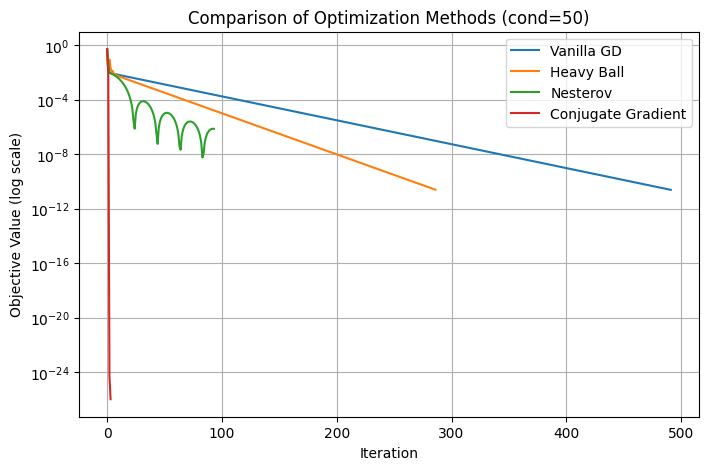

In [ ]:
'''
Changed parameters for alpha_hb_mod = 0.01 & alpha_nag_mod = 0.0125
alpha_hb_mod shouldn't be too much smaller than Beta_hb
'''
x0_scaled = np.array([0.1,0.1])
Q_moderate_cond = np.array([[50, 0], [0, 1]])  # condition number = 50
q_mod = np.array([0, 0])
r_mod = 0

# Generate function and gradient
f_mod, grad_mod = generate(Q_moderate_cond, q_mod, r_mod)

# Run all methods with tuned parameters
x0_mod = x0_scaled

# Vanilla Gradient Descent
x_gd_mod = gd(grad_mod, f_mod, x0_mod, 10000, 1e-5, 0.01)
f_gd_mod = np.apply_along_axis(f_mod, 1, x_gd_mod)

# Heavy Ball
alpha_hb_mod = 0.01
beta_hb_mod = 0.4
x_hb_mod = gd_heavyball(grad_mod, f_mod, x0_mod, 10000, 1e-5, alpha_hb_mod, beta_hb_mod)
f_hb_mod = np.apply_along_axis(f_mod, 1, x_hb_mod)

# Nesterov
alpha_nag_mod = 0.0125
x_nag_mod = gd_nesterov(grad_mod, f_mod, x0_mod, 10000, 1e-5, alpha_nag_mod)
f_nag_mod = np.apply_along_axis(f_mod, 1, x_nag_mod)

# Conjugate Gradient (no line search)
x_cg_mod = conjugate_gradient(f_mod, grad_mod, x0_mod, 10000, 1e-5)
f_cg_mod = np.apply_along_axis(f_mod, 1, x_cg_mod)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(f_gd_mod, label="Vanilla GD")
plt.plot(f_hb_mod, label="Heavy Ball")
plt.plot(f_nag_mod, label="Nesterov")
plt.plot(f_cg_mod, label="Conjugate Gradient")
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Objective Value (log scale)")
plt.title("Comparison of Optimization Methods (cond=50)")
plt.legend()
plt.grid(True)
plt.show()


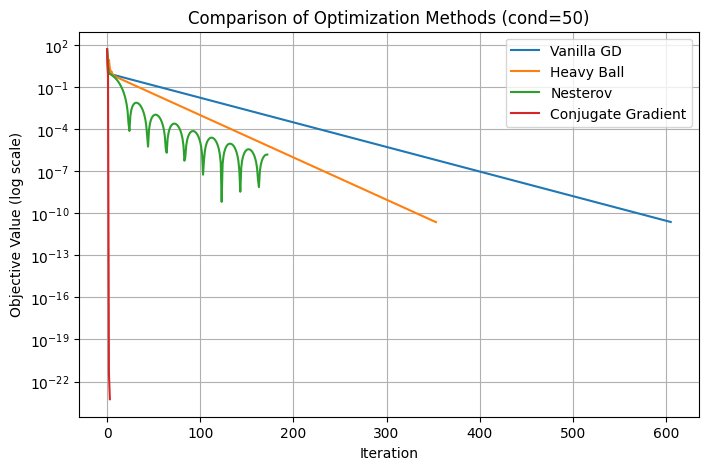

In [ ]:
'''
changed intial condition
'''
x0_scaled = np.array([1,1])
Q_moderate_cond = np.array([[50, 0], [0, 1]])  # condition number = 50
q_mod = np.array([0, 0])
r_mod = 0

# Generate function and gradient
f_mod, grad_mod = generate(Q_moderate_cond, q_mod, r_mod)

# Run all methods with tuned parameters
x0_mod = x0_scaled

# Vanilla Gradient Descent
x_gd_mod = gd(grad_mod, f_mod, x0_mod, 10000, 1e-5, 0.01)
f_gd_mod = np.apply_along_axis(f_mod, 1, x_gd_mod)

# Heavy Ball
alpha_hb_mod = 0.01
beta_hb_mod = 0.4
x_hb_mod = gd_heavyball(grad_mod, f_mod, x0_mod, 10000, 1e-5, alpha_hb_mod, beta_hb_mod)
f_hb_mod = np.apply_along_axis(f_mod, 1, x_hb_mod)

# Nesterov
alpha_nag_mod = 0.0125
x_nag_mod = gd_nesterov(grad_mod, f_mod, x0_mod, 10000, 1e-5, alpha_nag_mod)
f_nag_mod = np.apply_along_axis(f_mod, 1, x_nag_mod)

# Conjugate Gradient (no line search)
x_cg_mod = conjugate_gradient(f_mod, grad_mod, x0_mod, 10000, 1e-5)
f_cg_mod = np.apply_along_axis(f_mod, 1, x_cg_mod)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(f_gd_mod, label="Vanilla GD")
plt.plot(f_hb_mod, label="Heavy Ball")
plt.plot(f_nag_mod, label="Nesterov")
plt.plot(f_cg_mod, label="Conjugate Gradient")
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Objective Value (log scale)")
plt.title("Comparison of Optimization Methods (cond=50)")
plt.legend()
plt.grid(True)
plt.show()


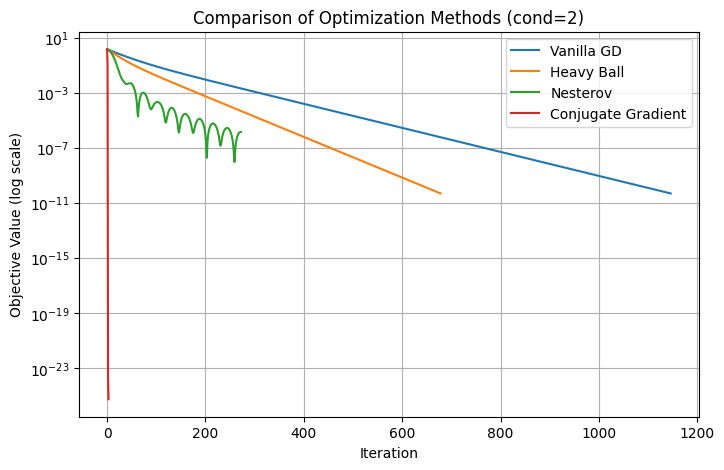

In [ ]:
'''
changed Q and therefore the condition number
'''
x0_scaled = np.array([1,1])
Q_moderate_cond = np.array([[0.5, 0], [0, 1]])  # condition number = 2
q_mod = np.array([0, 0])
r_mod = 0

# Generate function and gradient
f_mod, grad_mod = generate(Q_moderate_cond, q_mod, r_mod)

# Run all methods with tuned parameters
x0_mod = x0_scaled

# Vanilla Gradient Descent
x_gd_mod = gd(grad_mod, f_mod, x0_mod, 10000, 1e-5, 0.01)
f_gd_mod = np.apply_along_axis(f_mod, 1, x_gd_mod)

# Heavy Ball
alpha_hb_mod = 0.01
beta_hb_mod = 0.4
x_hb_mod = gd_heavyball(grad_mod, f_mod, x0_mod, 10000, 1e-5, alpha_hb_mod, beta_hb_mod)
f_hb_mod = np.apply_along_axis(f_mod, 1, x_hb_mod)

# Nesterov
alpha_nag_mod = 0.0125
x_nag_mod = gd_nesterov(grad_mod, f_mod, x0_mod, 10000, 1e-5, alpha_nag_mod)
f_nag_mod = np.apply_along_axis(f_mod, 1, x_nag_mod)

# Conjugate Gradient (no line search)
x_cg_mod = conjugate_gradient(f_mod, grad_mod, x0_mod, 10000, 1e-5)
f_cg_mod = np.apply_along_axis(f_mod, 1, x_cg_mod)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(f_gd_mod, label="Vanilla GD")
plt.plot(f_hb_mod, label="Heavy Ball")
plt.plot(f_nag_mod, label="Nesterov")
plt.plot(f_cg_mod, label="Conjugate Gradient")
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Objective Value (log scale)")
plt.title("Comparison of Optimization Methods (cond=2)")
plt.legend()
plt.grid(True)
plt.show()
